   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 15.7 MB/s eta 0:00:00
Euler Characteristic: 9


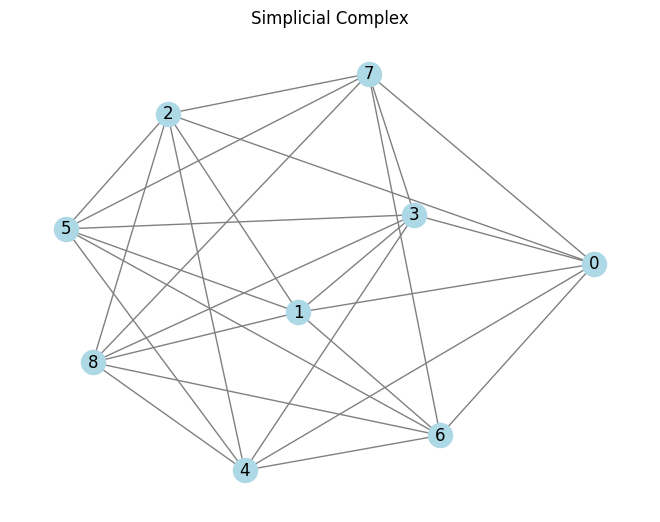

In [1]:
# Exercise 24
!pip install gudhi networkx matplotlib
import gudhi as gd
import networkx as nx
import matplotlib.pyplot as plt

def EulerCharacteristic(simplicial_complex):
    # Get all simplices and their dimensions
    all_simplices = simplicial_complex.get_filtration()

    # Filter simplices based on dimension
    num_vertices = len([s for s, _ in all_simplices if len(s) == 1])  # Dimension 0
    num_edges = len([s for s, _ in all_simplices if len(s) == 2])    # Dimension 1
    num_triangles = len([s for s, _ in all_simplices if len(s) == 3])  # Dimension 2

    # Calculate Euler characteristic
    euler_characteristic = num_vertices - num_edges + num_triangles

    return euler_characteristic

def DrawSimplicialComplex(simplicial_complex):
    # Create a networkx graph to represent the simplicial complex
    graph = nx.Graph()
    for simplex in simplicial_complex.get_skeleton(simplicial_complex.dimension()):
        if len(simplex[0]) > 1:  # Only consider edges and higher-dimensional simplices
            for i in range(len(simplex[0])):
                for j in range(i + 1, len(simplex[0])):
                    graph.add_edge(simplex[0][i], simplex[0][j])
        elif len(simplex[0]) == 1:
            graph.add_node(simplex[0][0]) #add nodes for 0-simplices

    # Draw the graph
    nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title("Simplicial Complex")
    plt.show()

torus = gd.SimplexTree()

torus.insert([0,3,7])
torus.insert([0,2,7])
torus.insert([2,7,5])
torus.insert([2,1,5])
torus.insert([1,5,3])
torus.insert([0,1,3])

torus.insert([3,4,8])
torus.insert([3,7,8])
torus.insert([7,8,6])
torus.insert([7,5,6])
torus.insert([5,6,4])
torus.insert([5,4,3])

torus.insert([4,0,2])
torus.insert([4,2,8])
torus.insert([8,2,1])
torus.insert([8,1,6])
torus.insert([6,1,0])
torus.insert([6,4,0])

print("Euler Characteristic:", EulerCharacteristic(torus)) # Print the result

DrawSimplicialComplex(torus)